In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "datasets/S02-hw-dataset.csv" # Загрузили файл
data = pd.read_csv(path)
len(data)

41

In [3]:
data.head(41)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
data.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [7]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [8]:
for i in range(len(data)):
    if (data.duplicated()[i]) == True:
        print(f"Есть повторяющиеся значения: строка:{i+2}")

Есть повторяющиеся значения: строка:42


In [9]:
print("Ошибочные значения:")
for i in data.columns:
    for j in range(len(data[i])):
        if (i == "purchases" or i == "age" or i == "revenue"):
            if data[i][j] < 0:
                print(f"{i}  {data[i][j]} в строке {j}")

Ошибочные значения:
purchases  -1 в строке 5


In [10]:
print("Странные значения")
for i in data.columns:
    for j in range(len(data[i])):
        if (i == "age"):
            if data[i][j] <= 0 or data[i][j] >= 100:
                print(f"{i}  {data[i][j]} в строке {j}")
        if (i == "revenue"):
            if data[i][j] <= 0:
                if data["purchases"][j] > 0:
                    print(f"{i}  {data[i][j]} в строке {j}, при purchases {data["purchases"][j]}")

Странные значения
age  120.0 в строке 5
revenue  0 в строке 10, при purchases 4


**Проблемы датасета:**  
Есть повторяющиеся значения.  
Есть небольшое количество ошибочных и странных значений которые могут повлиять на дальнейшую работу  

In [11]:
data.head(2)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115


In [12]:
data.value_counts("country")

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [13]:
group = data.groupby("country")
group["revenue"].median()

country
CN    1054.0
DE    1200.0
FR     619.5
RU     650.0
US     537.5
Name: revenue, dtype: float64

In [14]:
group = data.groupby("age")
group["revenue"].median()

age
5.0      1488.0
18.0     1104.0
20.0     1652.0
21.0      650.0
22.0      183.0
23.0      445.0
24.0      511.0
25.0      749.0
26.0     1080.0
28.0      228.0
31.0      548.0
32.0     2041.5
33.0      546.0
34.0     2086.0
35.0      534.0
36.0     2358.0
39.0     1071.0
42.0      904.0
43.0      828.0
45.0      404.0
46.0        0.0
47.0      936.0
51.0      342.0
52.0      550.5
54.0     1302.0
55.0      142.0
57.0      693.0
120.0     785.0
Name: revenue, dtype: float64

In [15]:
group["revenue"].sum()

age
5.0      1488
18.0     1104
20.0     1652
21.0      650
22.0      183
23.0      445
24.0     2137
25.0      749
26.0     1080
28.0      456
31.0     1096
32.0     4083
33.0      546
34.0     2086
35.0     1068
36.0     2358
39.0     2142
42.0      904
43.0      828
45.0      404
46.0        0
47.0     1872
51.0      342
52.0     1101
54.0     1302
55.0      142
57.0      693
120.0     785
Name: revenue, dtype: int64

In [16]:
group["age"]

In [17]:
group_2 = data.groupby("purchases")
group_2["revenue"].median().sort_values(ascending=False)

purchases
 11    2475.0
 9     1494.0
 8     1488.0
 6     1188.0
 4      942.0
-1      785.0
 7      721.0
 5      547.5
 2      442.0
 3      432.0
 1      142.0
 0        0.0
Name: revenue, dtype: float64

In [18]:
group_2["revenue"].sum().sort_values(ascending=False)

purchases
 6     8628
 7     7763
 4     2988
 9     2988
 5     2540
 3     2523
 11    2475
 8     1488
 2     1302
-1      785
 1      142
 0        0
Name: revenue, dtype: int64

**Анализ по странам**  

Большая часть покупок приходится на Россию и Францию  
Но средняя сумма покупки наибольшая среди покупателей и Китая и Германии 

**Анализ по среднем значениям**  

Средние значения возраста и страны отличаються  
так как разные возраста сильно отличатья в своих средних покупках  


**Анализ по соотношению суммы покупки к количеству**  

Интересно что количество покупок слабо коррелируеться с их суммой  
Также логично что наибольшая суммарная стоимость покупок достигается при среднем количестве покупок

In [19]:
import matplotlib.pyplot as plt

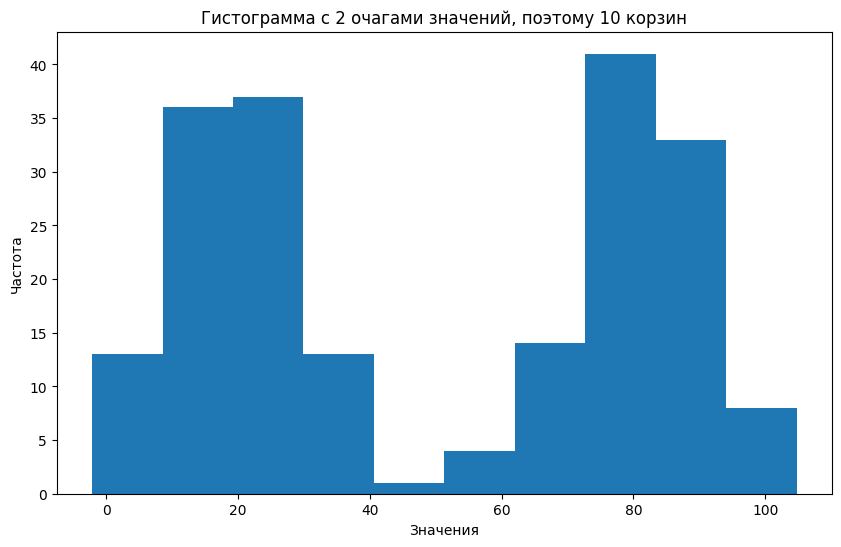

In [30]:
np.random.seed(777)

data = np.concatenate([
    np.random.normal(loc=20, scale=10, size=100),   # первая группа
    np.random.normal(loc=80, scale=10, size=100)    # вторая группа
])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=10)
plt.title("Гистограмма с 2 очагами значений, поэтому 10 корзин")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.savefig("figures/hist_plot.png")
plt.show()
#На грфмке видно 2 нормальных распределения, при этом видны их отличия

In [31]:
print(np.shape(data))

(200,)


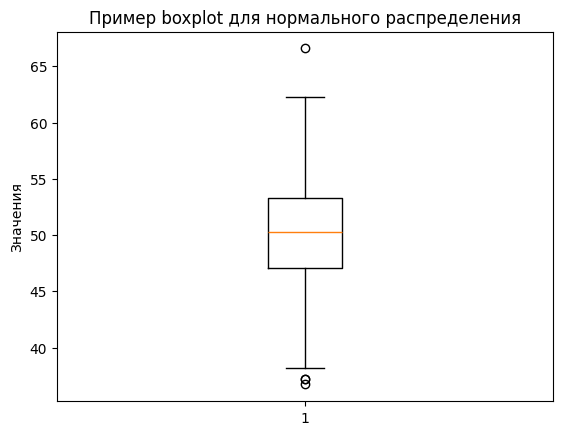

In [32]:
data = np.random.normal(loc=50, scale=5, size=500)

plt.boxplot(data)
plt.title("Пример boxplot для нормального распределения")
plt.ylabel("Значения")
plt.savefig("figures/box_plot.png")
plt.show()
#На данном графике показан график "коробки" для нормального распределеия, 
#видим коробку в районе 50 с расхождением в 5, а также некоторое количество выбросов

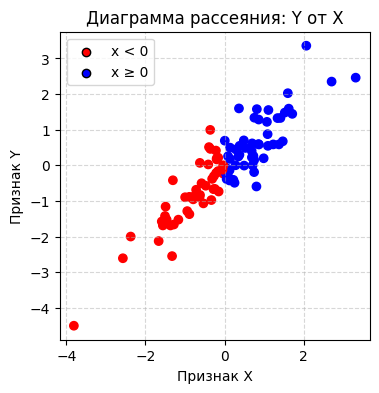

In [23]:
np.random.seed(50)
x = np.random.randn(100)
y = x + np.random.randn(100) * 0.5

colors = ['red' if x < 0 else 'blue' for x in x]
labels = ['x < 0', 'x ≥ 0']

plt.figure(figsize=(4,4))
plt.scatter(x, y, c=colors)
plt.scatter([], [], color='red', label='x < 0', edgecolors='k')
plt.scatter([], [], color='blue', label='x ≥ 0', edgecolors='k')

plt.title('Диаграмма рассеяния: Y от X')
plt.xlabel('Признак X')
plt.ylabel('Признак Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("figures/scatter_plot.png")
plt.show()
#На данной диаграмме видим простое распределение точек, при этом значения окрашены по знакам. 
#На графике видно что зависимость близка к линейной